In [1]:
from time import sleep
from dask import delayed

In [2]:
def m1(x, y):
    # Assume that there is pre complex task that takes 1 second
    sleep(1)
    return x + y + 2*x*y

def m2(a, b):
    # Assume that there is pre complex task that takes 1 second
    sleep(1)
    return a**3 - b**3

def m3(p, q):
    # Assume that there is pre complex task that takes 1 second
    sleep(1)
    return p*p + q*q

# Sequential Approach

In [3]:
%%time

n = 20
l1 = [i for i in range(n)]
l2 = [i ** 2 for i in range(n)]
l3 = [i ** 3 for i in range(n)]

result = []
for x, y, z in zip(l1, l2, l3):
    t1 = m1(x, y)
    t2 = m2(y, z)
    t3 = m3(t1, t2)
    result.append(t3)

print(sum(result))

164256575818881099099436
Wall time: 1min


# Use dask delayed function

In [4]:
%%time

n = 20
l1 = [i for i in range(n)]
l2 = [i ** 2 for i in range(n)]
l3 = [i ** 3 for i in range(n)]

result = []
for x, y, z in zip(l1, l2, l3):
    t1 = delayed(m1)(x, y)
    t2 = delayed(m2)(y, z)
    t3 = delayed(m3)(t1, t2)
    result.append(t3)

print(sum(result).compute())

164256575818881099099436
Wall time: 9.05 s


In [5]:
%%time

n = 20
l1 = [i for i in range(n)]
l2 = [i ** 2 for i in range(n)]
l3 = [i ** 3 for i in range(n)]

result = []
for x, y, z in zip(l1, l2, l3):
    t1 = delayed(m1)(x, y)
    t2 = delayed(m2)(y, z)
    t3 = delayed(m3)(t1, t2)
    result.append(t3)
    
final_sum = delayed(sum)(result)

print(final_sum.compute())

164256575818881099099436
Wall time: 9.02 s


# Performance analysis for just one iteration

In [6]:
%%time

x = 5
y = 25
z = 125

t1 = m1(x, y)
t2 = m2(y, z)
t3 = m3(t1, t2)

print(t3)

3753906328400
Wall time: 3 s


In [7]:
%%time

x = 5
y = 25
z = 125

t1 = delayed(m1)(x, y)
t2 = delayed(m2)(y, z)
t3 = delayed(m3)(t1, t2)

print(t3.compute())

3753906328400
Wall time: 2 s


The reason of one second less is because m1 and m2 runs together at the same time, see below task graph.  
Therefore it saves 1 second then proceed to m3.

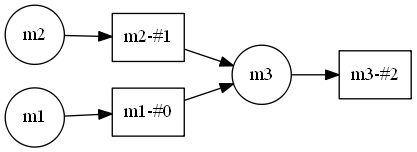

In [8]:
t3.visualize(rankdir='LR')